In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Datafile.csv')

In [11]:
df

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       20-07-2016  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[209593 rows x 36 columns]

In [12]:
df.shape

(209593, 36)

In [13]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [14]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

In [16]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

In [17]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [18]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [19]:
df.isnull()

label  msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0       False   False  False         False         False     False     False   
1       False   False  False         False         False     False     False   
2       False   False  False         False         False     False     False   
3       False   False  False         False         False     False     False   
4       False   False  False         False         False     False     False   
...       ...     ...    ...           ...           ...       ...       ...   
209588  False   False  False         False         False     False     False   
209589  False   False  False         False         False     False     False   
209590  False   False  False         False         False     False     False   
209591  False   False  False         False         False     False     False   
209592  False   False  False         False         False     False     False   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                   False              False             False  ...   
1                   False              False             False  ...   
2                   False              False             False  ...   
3                   False              False             False  ...   
4                   False              False             False  ...   
...                   ...                ...               ...  ...   
209588              False              False             False  ...   
209589              False              False             False  ...   
209590              False              False             False  ...   
209591              False              False             False  ...   
209592              False              False             False  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                 False               False        False         False   
1                 False               False        False         False   
2                 False               False        False         False   
3                 False               False        False         False   
4                 False               False        False         False   
...                 ...                 ...          ...           ...   
209588            False               False        False         False   
209589            False               False        False         False   
209590            False               False        False         False   
209591            False               False        False         False   
209592            False               False        False         False   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                 False               False      False      False    False   
1                 False               False      False      False    False   
2                 False               False      False      False    False   
3                 False               False      False      False    False   
4                 False               False      False      False    False   
...                 ...                 ...        ...        ...      ...   
209588            False               False      False      False    False   
209589            False               False      False      False    False   
209590            False               False      False      False    False   
209591            False               False      False      False    False   
209592            False               False      False      False    False   

        pdate  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
209588  False  
209589  False  
209590  False  
209591  False  
209592  False  

[209593 rows x 36 columns]

In [20]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 36 columns]

In [21]:
df.tail()

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

             pdate  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[5 rows x 36 columns]

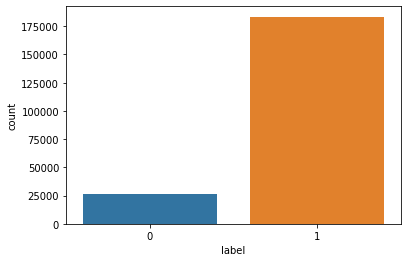

In [22]:
sns.countplot(x='label',data=df)
#as per countplot of label data is imbalanced 

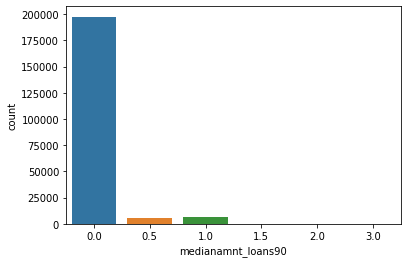

In [23]:
sns.countplot(df.medianamnt_loans90)

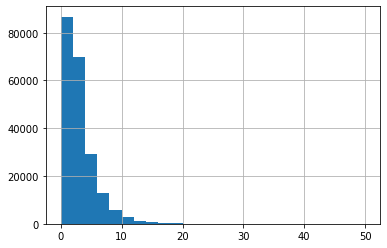

In [24]:
df['cnt_loans30'].hist(bins=25)

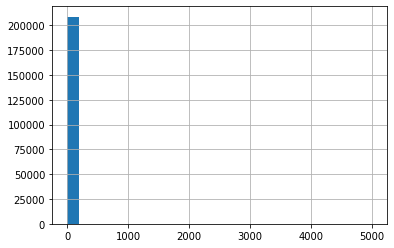

In [25]:
df['cnt_loans90'].hist(bins=25)

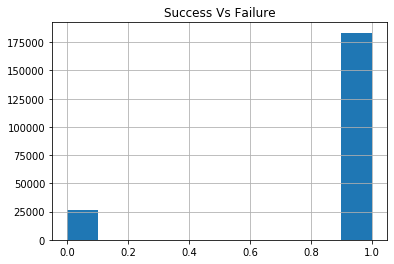

In [26]:
df['label'].hist(grid=True)  #univariate analysis
plt.title('Success Vs Failure')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


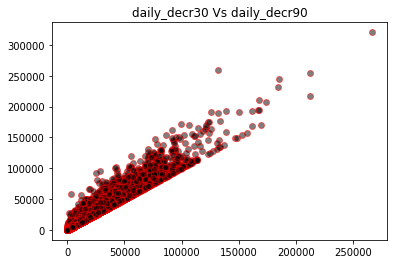

In [27]:
plt.scatter(df['daily_decr30'],df['daily_decr90'],alpha=0.5, c=(0,0,0),edgecolors='r')#bivariate analysis 
plt.title('daily_decr30 Vs daily_decr90')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


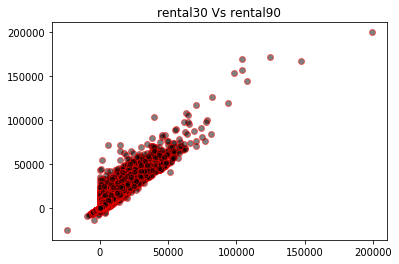

In [28]:
plt.scatter(df['rental30'],df['rental90'],alpha=0.5,c=(0,0,0),edgecolors='r') #bivariate analysis
plt.title('rental30 Vs rental90')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


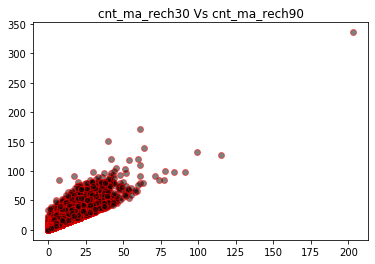

In [29]:
plt.scatter(df['cnt_ma_rech30'],df['cnt_ma_rech90'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('cnt_ma_rech30 Vs cnt_ma_rech90')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


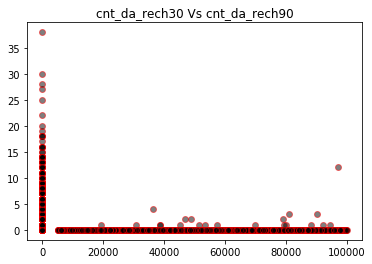

In [30]:
plt.scatter(df['cnt_da_rech30'],df['cnt_da_rech90'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('cnt_da_rech30 Vs cnt_da_rech90')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


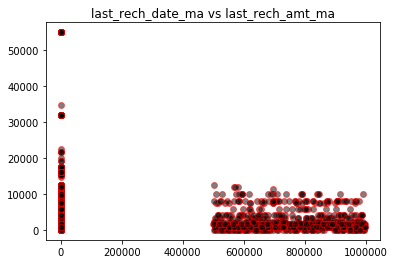

In [31]:
plt.scatter(df['last_rech_date_ma'],df['last_rech_amt_ma'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('last_rech_date_ma vs last_rech_amt_ma')
plt.show()

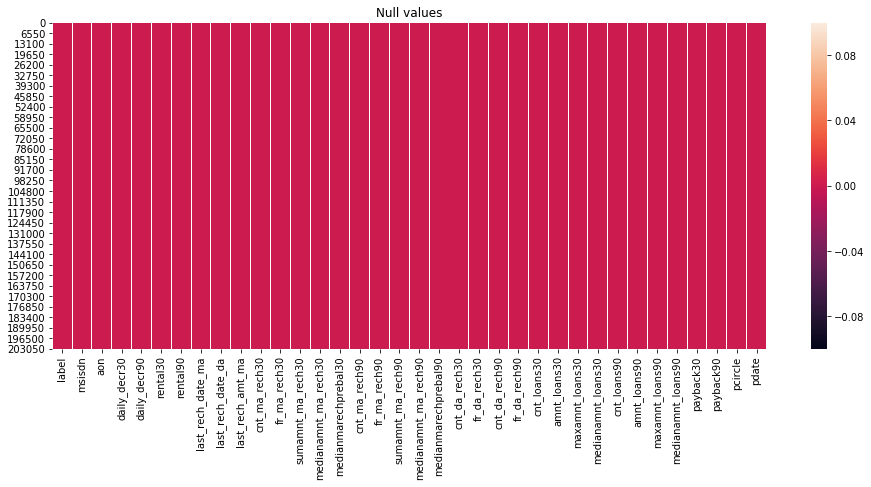

In [32]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [33]:
dfcor=df.corr()
dfcor

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

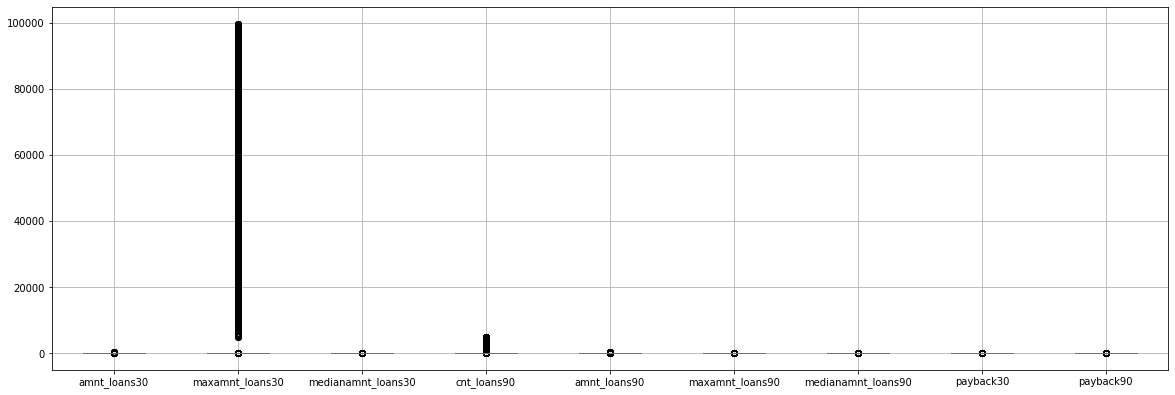

In [34]:
df.iloc[:,25:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

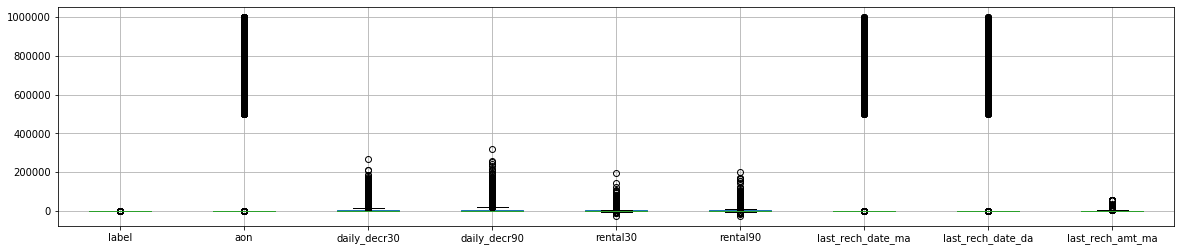

In [35]:
df.iloc[:,:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.50)
plt.show()

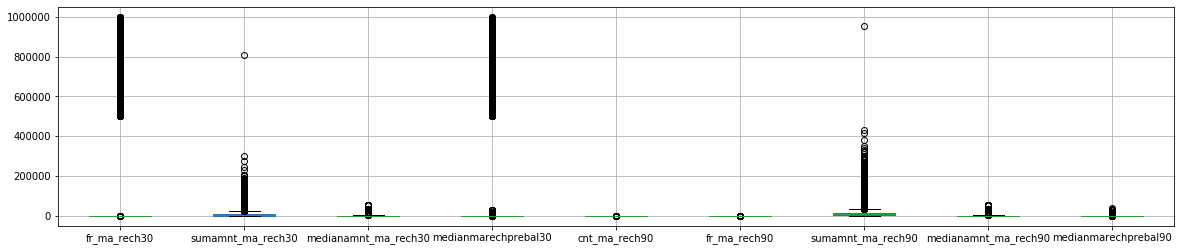

In [36]:
df.iloc[:,11:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.50)
plt.show()

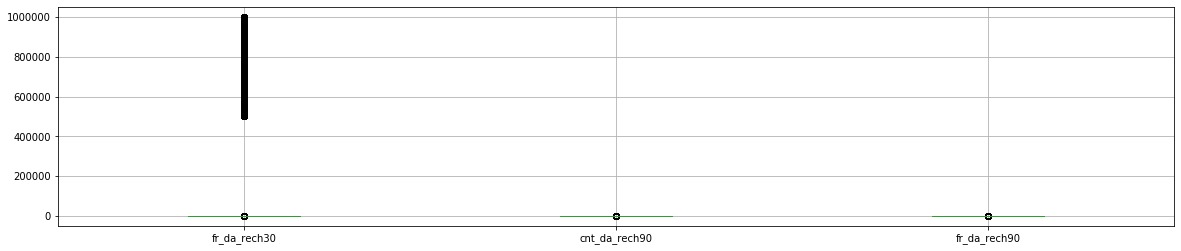

In [37]:
df.iloc[:,21:24].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.50)
plt.show()

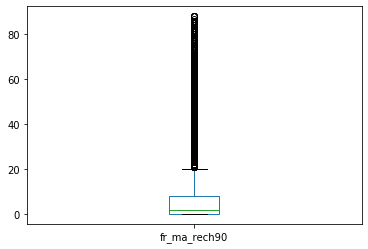

In [38]:
df['fr_ma_rech90'].plot.box()

In [39]:
df['fr_ma_rech90'].describe()
#as per graph and description frequency of recharge on main account in 90 days is outliers and its skewed

count    209593.000000
mean          7.716780
std          12.590251
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

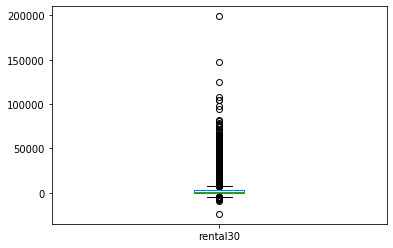

In [40]:
df['rental30'].plot.box()
#Average main account balance over last 30 days have outliers

In [41]:
df['rental30'].describe()

count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

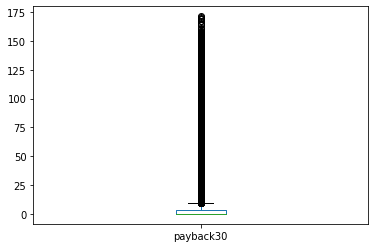

In [42]:
df['payback30'].plot.box()

In [43]:
df['payback30'].describe()

count    209593.000000
mean          3.398826
std           8.813729
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64

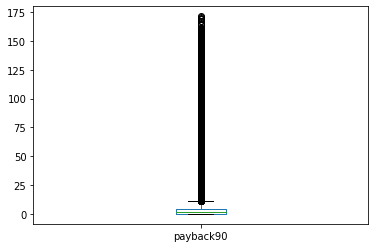

In [44]:
df['payback90'].plot.box()

In [45]:
df['payback90'].describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['pcircle']=le.fit_transform(df['pcircle'])
df['pdate']=le.fit_transform(df['pdate'])
df['msisdn']=le.fit_transform(df['msisdn'])

In [47]:
df

label  msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   40191   272.0   3055.050000   3065.150000    220.13    260.13   
1           1  142291   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   33594   535.0   1398.000000   1398.000000    900.13    900.13   
3           1  104157   241.0     21.228000     21.228000    159.42    159.42   
4           1    6910   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...     ...           ...           ...       ...       ...   
209588      1   42866   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  178248  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1   53995  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  111388  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  121263  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                     2.0                0.0              1539  ...   
1                    20.0                0.0              5787  ...   
2                     3.0                0.0              1539  ...   
3                    41.0                0.0               947  ...   
4                     4.0                0.0              2309  ...   
...                   ...                ...               ...  ...   
209588                1.0                0.0              4048  ...   
209589                4.0                0.0               773  ...   
209590                3.0                0.0              1539  ...   
209591                2.0               38.0               773  ...   
209592               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000        0   
1                    12                 0.0   0.000000   0.000000        0   
2                     6                 0.0   0.000000   0.000000        0   
3                     6                 0.0   0.000000   0.000000        0   
4                     6                 0.0   2.333333   2.333333        0   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000        0   
209589                6                 0.0   1.000000   1.000000        0   
209590               12                 0.0   4.000000   3.833333        0   
209591               12                 0.0   0.000000  10.500000        0   
209592               12                 0.0   0.000000   0.000000        0   

        pdate  
0          58  
1          29  
2          56  
3          15  
4          63  
...       ...  
209588     48  
209589     33  
209590     78  
209591     70  
209592     19  

[209593 rows x 36 columns]

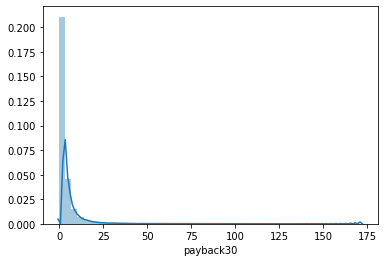

In [48]:
sns.distplot(df['payback30'])
plt.show()

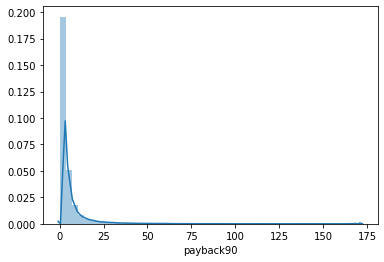

In [49]:
sns.distplot(df['payback90'])
plt.show()

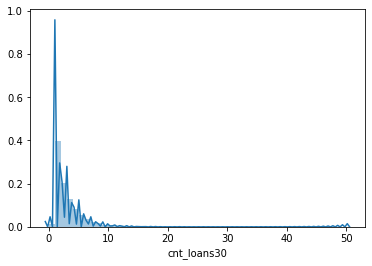

In [50]:
sns.distplot(df['cnt_loans30'])
#skewness present in this column

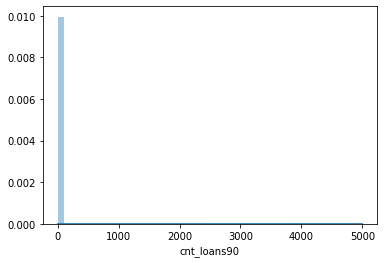

In [51]:
sns.distplot(df['cnt_loans90'])
#as its not providing any information on number of loans taken by user in last 90 days
#we can drop this column
#df.drop('cnt_loans90',axis=1,inplace=True)

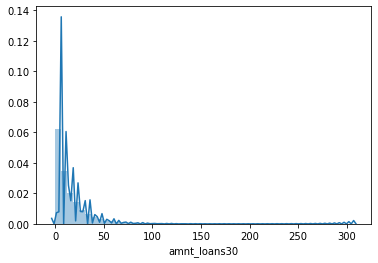

In [52]:
sns.distplot(df['amnt_loans30'])

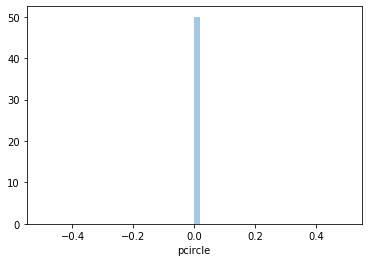

In [53]:
sns.distplot(df['pcircle'])

In [54]:
#df.drop(columns=['pcircle'],inplace=True)

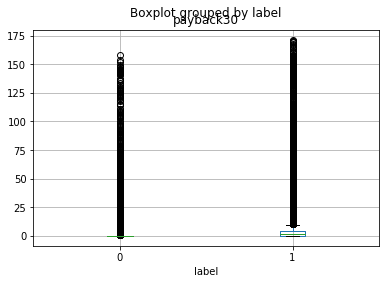

In [55]:
df.boxplot(column='payback30',by='label')

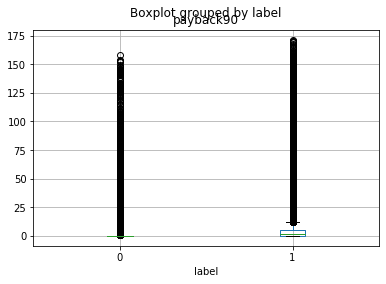

In [56]:
df.boxplot(column='payback90',by='label')

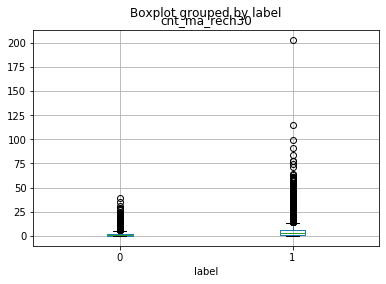

In [57]:
df.boxplot(column='cnt_ma_rech30',by='label')

In [58]:
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
pdate                   0.006406
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
msisdn                  0.001976
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

In [59]:
df.drop(columns=['pcircle'],inplace=True)

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.984213  , 0.10357685, ..., 2.9046997 , 2.39409346,
        0.76219151],
       [0.37765836, 0.91502744, 0.09776412, ..., 0.38562959, 0.41923266,
        0.46633468],
       [0.37765836, 1.10692885, 0.10010243, ..., 0.38562959, 0.41923266,
        0.67746556],
       ...,
       [0.37765836, 0.7274342 , 0.09378769, ..., 0.06820893, 0.04735622,
        1.60945095],
       [0.37765836, 0.34017702, 0.08428915, ..., 0.38562959, 0.59938541,
        1.27054717],
       [0.37765836, 0.52386948, 0.08628398, ..., 0.38562959, 0.41923266,
        0.8899644 ]])

In [61]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [62]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [63]:
x=df.drop('label',axis=1)
y=df['label']

In [64]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#power transform to remove skewness

In [65]:
df_new.skew()

msisdn                   -0.291511
aon                       1.654517
daily_decr30             -6.582718
daily_decr90             -7.080191
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362530
last_rech_date_da      -106.606657
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90        

In [66]:
x=df_new

In [67]:
x.skew()

msisdn                   -0.291511
aon                       1.654517
daily_decr30             -6.582718
daily_decr90             -7.080191
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362530
last_rech_date_da      -106.606657
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90        

In [68]:
daily_decr90_sqrt=np.sqrt(df_new['daily_decr90'])
daily_decr90_sqrt.skew()

-0.18849195450046488

In [69]:
aon_log=np.log(df_new['aon'])
aon_log.skew()

-0.2762252354638221

In [70]:
rental30_cbrt=np.cbrt(df_new['rental30'])
rental30_cbrt.skew()

0.8049839502452641

In [71]:
rental90_log=np.log(df_new['rental90'])
rental90_log.skew()

-0.9948405628611511

In [72]:
last_rech_date_ma_log=np.log(df_new['last_rech_date_ma'])
last_rech_date_ma_log.skew()

-1.3570734518665957

In [73]:
last_rech_date_da_sqrt=np.sqrt(df_new['last_rech_date_da'])
last_rech_date_da_sqrt.skew()

1.485556785087015

In [74]:
medianmarechprebal90_log=np.log(df_new['medianmarechprebal90'])
medianmarechprebal90_log.skew()

-0.5599008697682826

In [75]:
cnt_da_rech30_log=np.log(df_new['cnt_da_rech30'])
cnt_da_rech30_log.skew()

0.26890480723112925

In [76]:
fr_da_rech30_log=np.log(df_new['fr_da_rech30'])
fr_da_rech30_log.skew()

-5.078695733124413

In [77]:
cnt_da_rech90_log=np.log(df_new['cnt_da_rech90'])
cnt_da_rech90_log.skew()

0

In [78]:
maxamnt_loans30_cbrt=np.cbrt(df_new['maxamnt_loans30'])
maxamnt_loans30_cbrt.skew()

1.6685555051185397

In [79]:
medianamnt_loans30_log=np.log(df_new['medianamnt_loans30'])
medianamnt_loans30_log.skew()

-0.15199373233209065

In [80]:
df.shape

(209593, 35)

In [81]:
df

label  msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   40191   272.0   3055.050000   3065.150000    220.13    260.13   
1           1  142291   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   33594   535.0   1398.000000   1398.000000    900.13    900.13   
3           1  104157   241.0     21.228000     21.228000    159.42    159.42   
4           1    6910   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...     ...           ...           ...       ...       ...   
209588      1   42866   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  178248  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1   53995  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  111388  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  121263  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                     2.0                0.0              1539  ...   
1                    20.0                0.0              5787  ...   
2                     3.0                0.0              1539  ...   
3                    41.0                0.0               947  ...   
4                     4.0                0.0              2309  ...   
...                   ...                ...               ...  ...   
209588                1.0                0.0              4048  ...   
209589                4.0                0.0               773  ...   
209590                3.0                0.0              1539  ...   
209591                2.0               38.0               773  ...   
209592               13.0                0.0              7526  ...   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0                 12              6.0                 0.0          2.0   
1                 12             12.0                 0.0          1.0   
2                  6              6.0                 0.0          1.0   
3                 12              6.0                 0.0          2.0   
4                 42              6.0                 0.0          7.0   
...              ...              ...                 ...          ...   
209588            12              6.0                 0.0          2.0   
209589            18              6.0                 0.0          3.0   
209590            42             12.0                 0.0          6.0   
209591            18             12.0                 0.0          3.0   
209592            18             12.0                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90  pdate  
0       29.000000     58  
1        0.000000     29  
2        0.000000     56  
3        0.000000     15  
4        2.333333     63  
...           ...    ...  
209588   1.000000     48  
209589   1.000000     33  
209590   3.833333     78  
209591  10.500000     70  
209592   0.000000     19  

[209593 rows x 35 columns]

In [82]:
x=df.iloc[:,1:]
x.head()

msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0   40191  272.0   3055.050000   3065.150000    220.13    260.13   
1  142291  712.0  12122.000000  12124.750000   3691.26   3691.26   
2   33594  535.0   1398.000000   1398.000000    900.13    900.13   
3  104157  241.0     21.228000     21.228000    159.42    159.42   
4    6910  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pdate  
0     58  
1     29  
2     56  
3     15  
4     63  

[5 rows x 34 columns]

In [83]:
y=df.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [84]:
from sklearn.preprocessing import StandardScaler
x_features=x
x=StandardScaler().fit_transform(x)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [86]:
x_train.shape

(140427, 34)

In [87]:
x_test.shape

(69166, 34)

In [88]:
y_train.shape

(140427,)

In [89]:
y_test.shape

(69166,)

In [90]:
from sklearn.decomposition import PCA
pca=PCA(n_components=34)
y=pca.fit_transform(x)
#using PCA reducing the size of dataset and retain the maximum information to train model

In [91]:
sum(pca.explained_variance_ratio_)


1.0

In [92]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)*100
var_cumu

array([ 20.20898287,  29.61267552,  35.3598866 ,  40.91786311,
        45.82174155,  49.81396357,  52.87281932,  55.85010636,
        58.81301877,  61.76542679,  64.71457033,  67.66046967,
        70.60233519,  73.52729353,  76.45159951,  79.37193493,
        82.29027732,  85.18551961,  87.95766227,  90.56064164,
        92.959379  ,  94.87010631,  96.38873244,  97.26050874,
        97.86853953,  98.39754316,  98.88536529,  99.27734595,
        99.53264089,  99.70570798,  99.82682669,  99.89677632,
        99.95684914, 100.        ])

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(roc_auc_score(y_test,preddtc))
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7303583215834667
0.8752566289795565
[[ 4666  4026]
 [ 4602 55872]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      8692
           1       0.93      0.92      0.93     60474

    accuracy                           0.88     69166
   macro avg       0.72      0.73      0.72     69166
weighted avg       0.88      0.88      0.88     69166



In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(roc_auc_score(y_test,predrfc))
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.731389595823916
0.919006448254923
[[ 4179  4513]
 [ 1089 59385]]
              precision    recall  f1-score   support

           0       0.79      0.48      0.60      8692
           1       0.93      0.98      0.95     60474

    accuracy                           0.92     69166
   macro avg       0.86      0.73      0.78     69166
weighted avg       0.91      0.92      0.91     69166



In [95]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
predknc=knc.predict(x_test)
print(roc_auc_score(y_test,predknc))
print(accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

0.6334169506366798
0.8739554116184253
[[ 2713  5979]
 [ 2739 57735]]
              precision    recall  f1-score   support

           0       0.50      0.31      0.38      8692
           1       0.91      0.95      0.93     60474

    accuracy                           0.87     69166
   macro avg       0.70      0.63      0.66     69166
weighted avg       0.85      0.87      0.86     69166



In [96]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(roc_auc_score(y_test,predgnb))
print(accuracy_score(y_test,predgnb))
print(classification_report(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))

0.704165071848945
0.5805308966833416
              precision    recall  f1-score   support

           0       0.21      0.87      0.34      8692
           1       0.97      0.54      0.69     60474

    accuracy                           0.58     69166
   macro avg       0.59      0.70      0.52     69166
weighted avg       0.87      0.58      0.65     69166

[[ 7556  1136]
 [27877 32597]]


In [97]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
predabc=abc.predict(x_test)
print(roc_auc_score(y_test,predabc))
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.6538364808030366
0.905011132637423
[[ 2767  5925]
 [  645 59829]]
              precision    recall  f1-score   support

           0       0.81      0.32      0.46      8692
           1       0.91      0.99      0.95     60474

    accuracy                           0.91     69166
   macro avg       0.86      0.65      0.70     69166
weighted avg       0.90      0.91      0.89     69166



In [101]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()


grid_param={'criterion':['gini','entropy']}

#gridk{'kernel':['linear','rbf','poly']}

gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8801227864805636


In [103]:
rfc=RandomForestClassifier(criterion='entropy')
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

0.9999572731739623

In [104]:
import joblib
joblib.dump(rfc,'rfcfile.obj')
rfc_from_joblib=joblib.load('rfcfile.obj')
rfc_from_joblib.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)